In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data Sets /Air_Traffic_Passenger_Statistics - Copy.csv")
df.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [ ]:
df.columns

Index(['index', 'Activity Period', 'Operating Airline',
       'Operating Airline IATA Code', 'Published Airline',
       'Published Airline IATA Code', 'GEO Summary', 'GEO Region',
       'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count'],
      dtype='object')

In [ ]:
df.dtypes

,0
index,int64
Activity Period,int64
Operating Airline,object
Operating Airline IATA Code,object
Published Airline,object
Published Airline IATA Code,object
GEO Summary,object
GEO Region,object
Activity Type Code,object
Price Category Code,object


In [ ]:
df.isna().sum()

,0
index,0
Activity Period,0
Operating Airline,0
Operating Airline IATA Code,54
Published Airline,0
Published Airline IATA Code,54
GEO Summary,0
GEO Region,0
Activity Type Code,0
Price Category Code,0


In [ ]:
df=df.drop(['index','Operating Airline IATA Code','Published Airline IATA Code'],axis=1)

In [ ]:
# Convert Activity Period to datetime
df['Activity Period'] = pd.to_datetime(df['Activity Period'].astype(str), format='%Y%m')
df.head()

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,2005-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,2005-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,2005-07-01,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,2005-07-01,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,2005-07-01,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [ ]:
# Extract Year and Month Name
df['Year'] = df['Activity Period'].dt.year
df['Month'] = df['Activity Period'].dt.strftime('%B')

In [ ]:
df['Activity Period'] = df['Activity Period'].dt.strftime('%Y-%m')

In [ ]:
df.head()

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
0,2005-07,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,July
1,2005-07,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,July
2,2005-07,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,July
3,2005-07,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,July
4,2005-07,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,July


In [ ]:
def season(month):
  if month in ['December','January','February']:
    return "Winter"
  elif month in ['March', 'April', 'May']:
    return "Spring"
  elif month in ['June', 'July', 'August']:
    return "Summer"
  else:
    return "Autumn"

In [ ]:
df['Seasons']=df['Month'].apply(season)
df.head()

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month,Seasons
0,2005-07,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,July,Summer
1,2005-07,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,July,Summer
2,2005-07,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,July,Summer
3,2005-07,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,July,Summer
4,2005-07,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,July,Summer


In [ ]:
df.shape

(15007, 13)

In [ ]:
df.nunique()

,0
Activity Period,129
Operating Airline,77
Published Airline,68
GEO Summary,2
GEO Region,9
Activity Type Code,3
Price Category Code,2
Terminal,5
Boarding Area,8
Passenger Count,11699


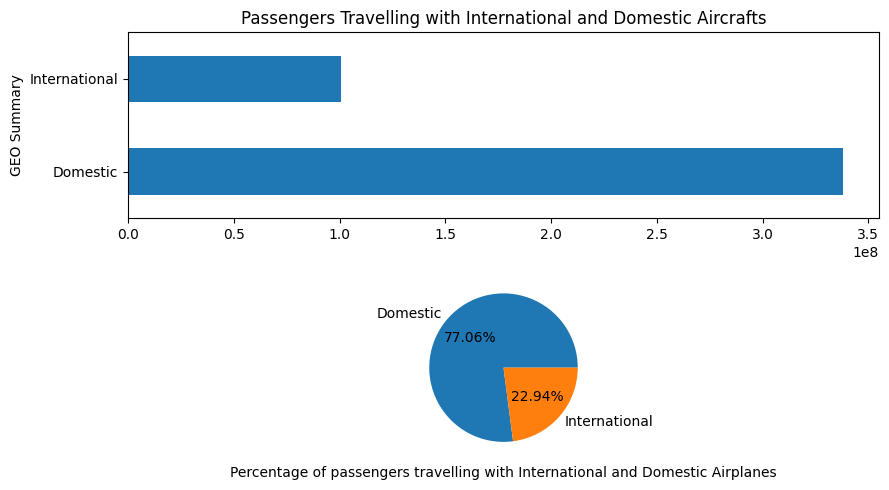

In [ ]:
#Passenger count with di
plt.figure(figsize=(9,5))
plt.subplot(2,1,1)
plt.title("Passengers Travelling with International and Domestic Aircrafts")
df.groupby('GEO Summary')['Passenger Count'].sum().plot.barh()
plt.subplot(2,1,2)
df.groupby('GEO Summary')['Passenger Count'].sum().plot.pie(autopct="%1.2f%%")
plt.ylabel("")
plt.xlabel("Percentage of passengers travelling with International and Domestic Airplanes")
plt.tight_layout()

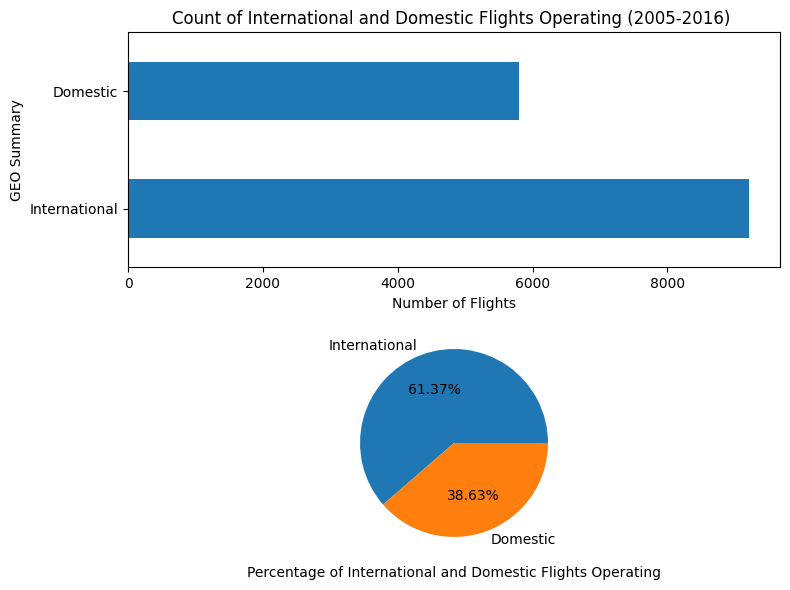

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.title("Count of International and Domestic Flights Operating (2005-2016) ")
df['GEO Summary'].value_counts().plot.barh()
plt.xlabel("Number of Flights")
plt.subplot(2,1,2)
df['GEO Summary'].value_counts().plot.pie(autopct="%1.2f%%")
plt.ylabel("")
plt.xlabel("Percentage of International and Domestic Flights Operating")
plt.tight_layout()
plt.show()

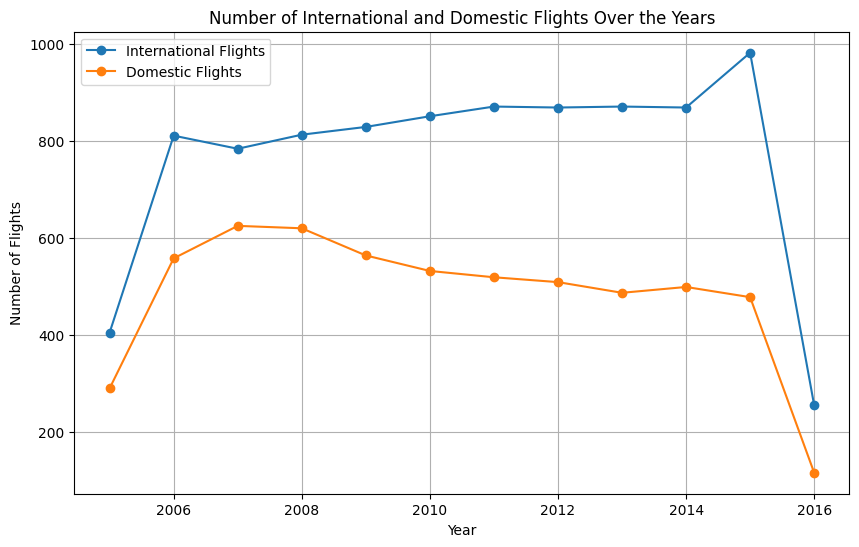

In [ ]:
flight_counts = df.groupby(['Year', 'GEO Summary']).size().unstack(fill_value=0)

# Plot the results

plt.figure(figsize=(10, 6))
plt.plot(flight_counts.index, flight_counts['International'], marker='o', label='International Flights')
plt.plot(flight_counts.index, flight_counts['Domestic'], marker='o', label='Domestic Flights')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('Number of International and Domestic Flights Over the Years')
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 0, 'Count of flights')

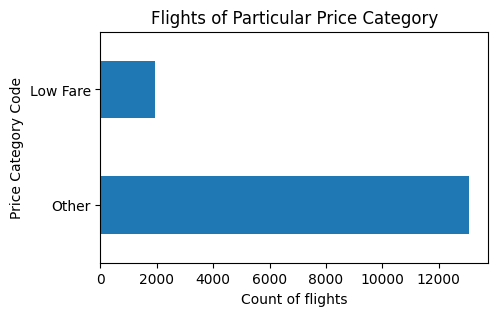

In [ ]:
plt.figure(figsize=(5,3))
df['Price Category Code'].value_counts().plot.barh()
plt.title("Flights of Particular Price Category")
plt.xlabel("Count of flights")

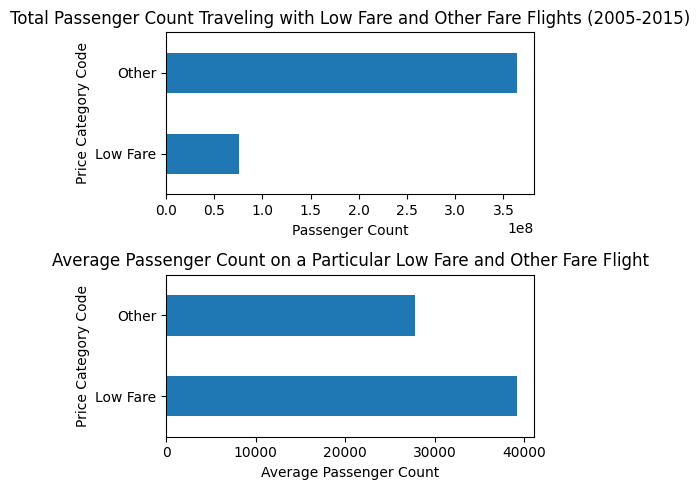

In [ ]:
plt.figure(figsize=(5,5))
plt.subplot(2,1,1)
plt.title("Total Passenger Count Traveling with Low Fare and Other Fare Flights (2005-2015)")
df.groupby("Price Category Code")["Passenger Count"].sum().plot.barh()
plt.xlabel("Passenger Count")
plt.subplot(2,1,2)
plt.title("Average Passenger Count on a Particular Low Fare and Other Fare Flight")
df.groupby("Price Category Code")["Passenger Count"].mean().plot.barh()
plt.xlabel("Average Passenger Count")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Variation of Internatinal and Domestic Passengers ')

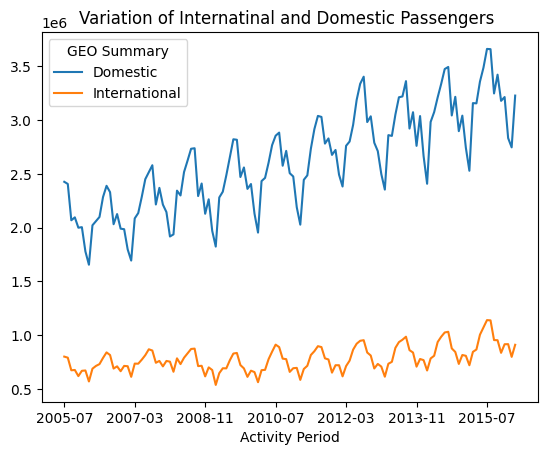

In [ ]:
df.groupby(["Activity Period", "GEO Summary"])["Passenger Count"].sum().unstack().plot()
plt.title("Variation of Internatinal and Domestic Passengers ")

Text(0.5, 0, 'Flight Count')

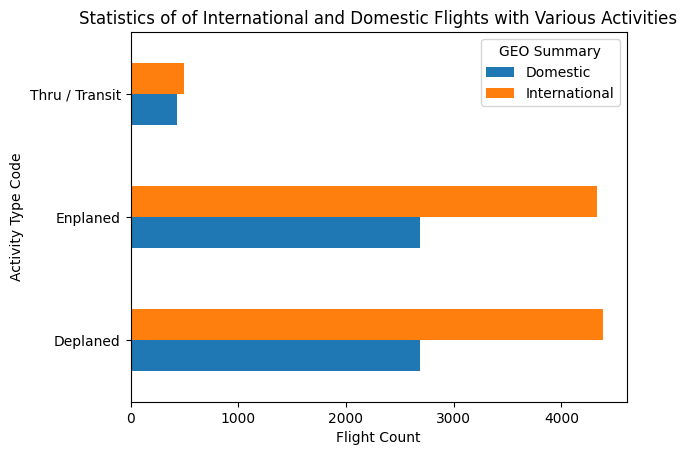

In [ ]:

pd.crosstab(df['Activity Type Code'], df['GEO Summary']).plot.barh()
plt.title("Statistics of of International and Domestic Flights with Various Activities")
plt.xlabel("Flight Count")

<Axes: ylabel='Activity Type Code'>

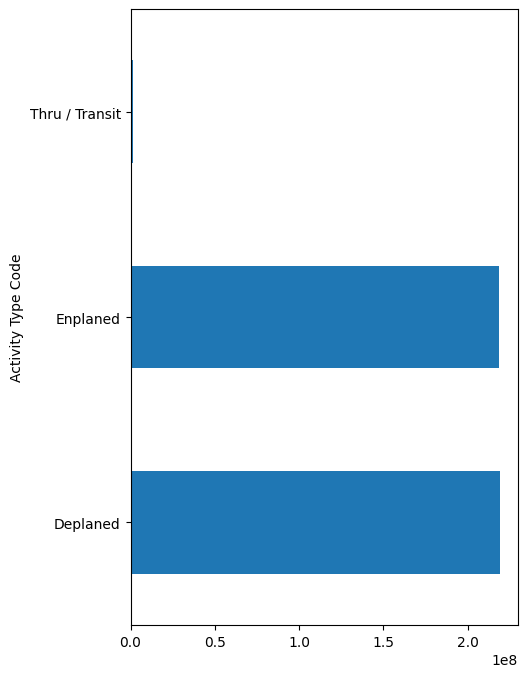

In [ ]:

plt.figure(figsize=(5,8))
df.groupby(['Activity Type Code'])['Passenger Count'].sum().plot.barh()


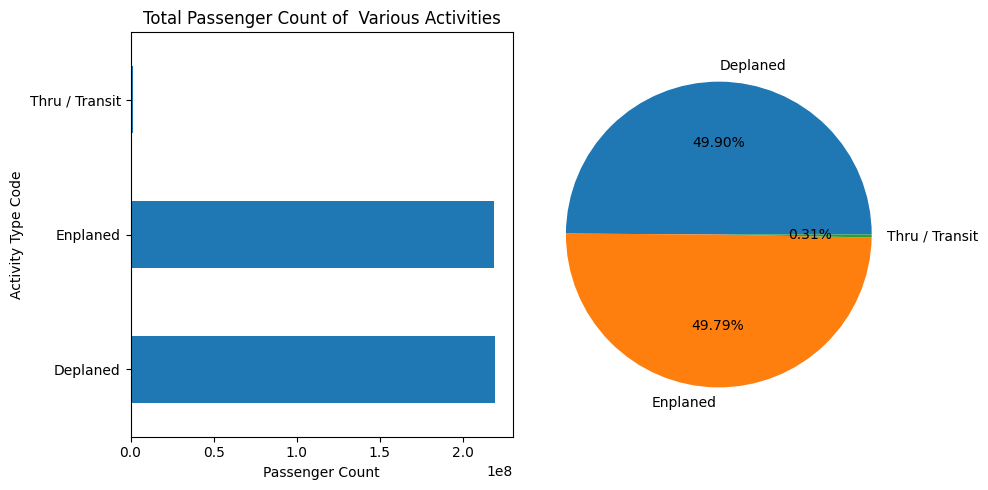

In [ ]:
df_activity=df.groupby('Activity Type Code')
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Total Passenger Count of  Various Activities")

df_activity['Passenger Count'].sum().plot.barh()
plt.xlabel("Passenger Count")
plt.subplot(1,2,2)
df_activity['Passenger Count'].sum().plot.pie(autopct=("%1.2f%%"))
plt.ylabel("")
plt.tight_layout()
plt.show()

In [ ]:
df.groupby(["Year","Activity Type Code"]).size().unstack(fill_value=0)

Activity Type Code,Deplaned,Enplaned,Thru / Transit
Year,,,
2005,319,317,59
2006,624,624,121
2007,644,647,118
2008,659,653,121
2009,649,638,106
2010,648,636,99
2011,659,646,85
2012,655,650,73
2013,670,661,27


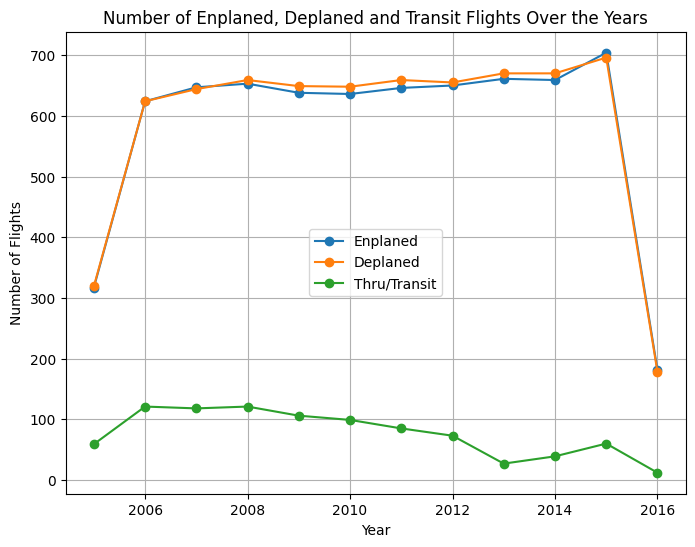

In [ ]:
yearly_Activity=df.groupby(["Year","Activity Type Code"]).size().unstack(fill_value=0)
plt.figure(figsize=(8, 6))
plt.plot(yearly_Activity.index, yearly_Activity['Enplaned'], marker='o', label='Enplaned')
plt.plot(yearly_Activity.index, yearly_Activity['Deplaned'], marker='o', label='Deplaned')
plt.plot(yearly_Activity.index, yearly_Activity['Thru / Transit'], marker='o', label='Thru/Transit')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('Number of Enplaned, Deplaned and Transit Flights Over the Years')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Flight Activity with Time')

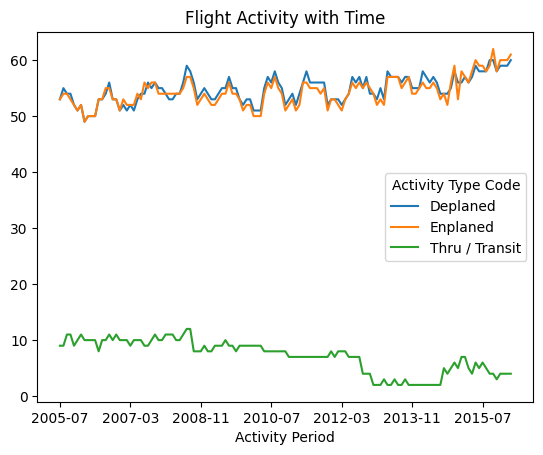

In [ ]:

pd.crosstab(df['Activity Period'],df['Activity Type Code']).plot()
plt.title("Flight Activity with Time")

On Average every month 116 flights

Text(0.5, 1.0, 'International and Domestic Flights with Time')

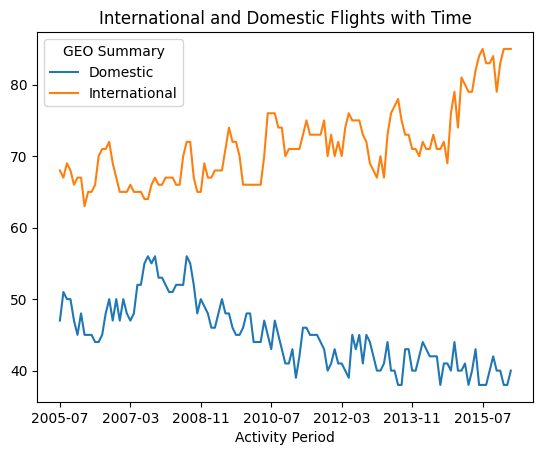

In [ ]:
pd.crosstab(df['Activity Period'], df['GEO Summary']).plot()
plt.title("International and Domestic Flights with Time")

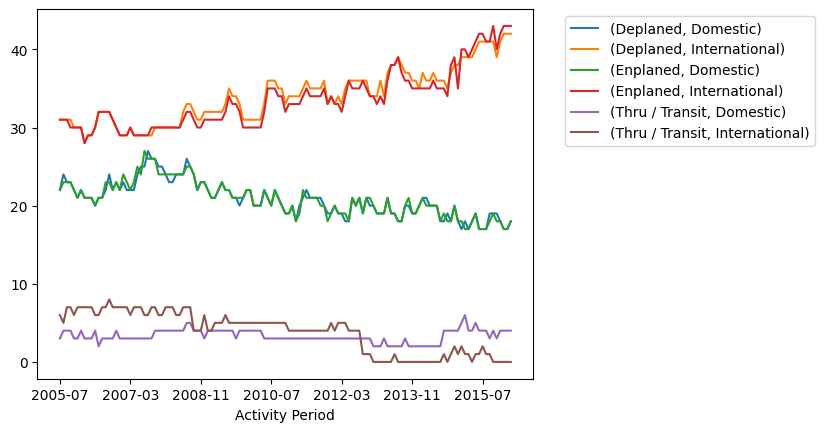

In [ ]:
pd.crosstab(index=df['Activity Period'], columns=[ df['Activity Type Code'],df['GEO Summary']]).plot.line()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
pd.crosstab(index=[df["Activity Period"],df['GEO Summary']], columns=df['Operating Airline']).head()

Operating Airline              ATA Airlines  Aer Lingus  Aeromexico  \
Activity Period GEO Summary                                           
2005-07         Domestic                  3           0           0   
                International             0           0           0   
2005-08         Domestic                  3           0           0   
                International             0           0           0   
2005-09         Domestic                  3           0           0   

Operating Airline              Air Berlin  Air Canada   Air Canada Jazz  \
Activity Period GEO Summary                                               
2005-07         Domestic                0            0                0   
                International           0            2                0   
2005-08         Domestic                0            0                0   
                International           0            2                0   
2005-09         Domestic                0            0                0   

Operating Airline              Air China  Air France  Air India Limited  \
Activity Period GEO Summary                                               
2005-07         Domestic               0           0                  0   
                International          2           2                  0   
2005-08         Domestic               0           0                  0   
                International          2           2                  0   
2005-09         Domestic               0           0                  0   

Operating Airline              Air New Zealand  ...  Turkish Airlines  \
Activity Period GEO Summary                     ...                     
2005-07         Domestic                     0  ...                 0   
                International                2  ...                 0   
2005-08         Domestic                     0  ...                 0   
                International                2  ...                 0   
2005-09         Domestic                     0  ...                 0   

Operating Airline              US Airways  United Airlines  \
Activity Period GEO Summary                                  
2005-07         Domestic                4                2   
                International           0                0   
2005-08         Domestic                4                2   
                International           0                0   
2005-09         Domestic                4                2   

Operating Airline              United Airlines - Pre 07/01/2013  \
Activity Period GEO Summary                                       
2005-07         Domestic                                      5   
                International                                15   
2005-08         Domestic                                      8   
                International                                14   
2005-09         Domestic                                      8   

Operating Airline              Virgin America  Virgin Atlantic  \
Activity Period GEO Summary                                      
2005-07         Domestic                    0                0   
                International               0                2   
2005-08         Domestic                    0                0   
                International               0                2   
2005-09         Domestic                    0                0   

Operating Airline              WestJet Airlines  World Airways  \
Activity Period GEO Summary                                      
2005-07         Domestic                      0              0   
                International                 2              0   
2005-08         Domestic                      0              0   
                International                 2              0   
2005-09         Domestic                      0              0   

Operating Airline              XL Airways France  Xtra Airways  
Activity Period GEO Summary               

Text(0, 0.5, 'Passenger Count')

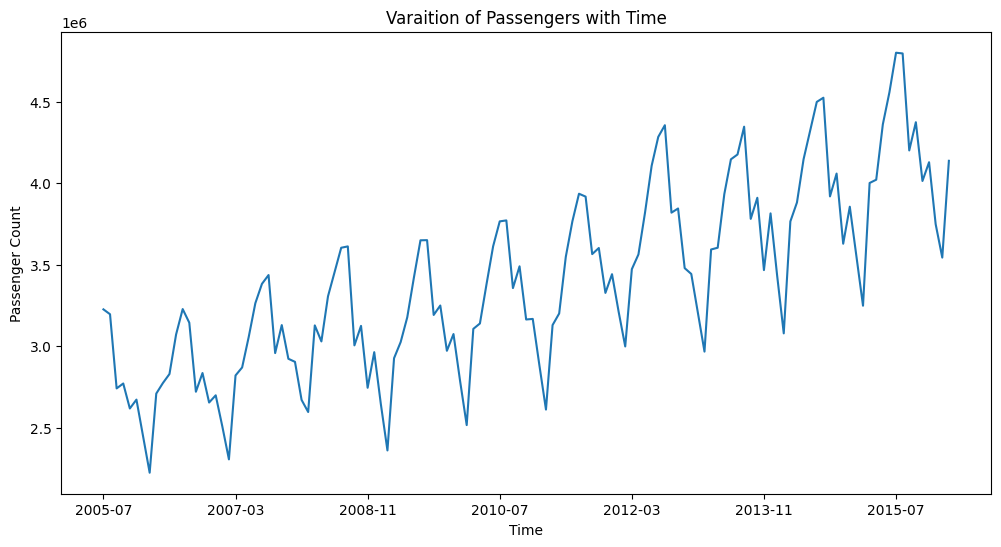

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Varaition of Passengers with Time")
df.groupby(['Activity Period'])['Passenger Count'].sum().plot()
plt.xlabel("Time")
plt.ylabel("Passenger Count")

In [ ]:
df['Passenger Count'].describe()

,Passenger Count
count,15007.000000
mean,29240.521090
std,58319.509284
min,1.000000
25%,5373.500000
50%,9210.000000
75%,21158.500000
max,659837.000000


<ipython-input-35-50c69a830a9e>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df['Month'])['Passenger Count'].mean().plot.barh()


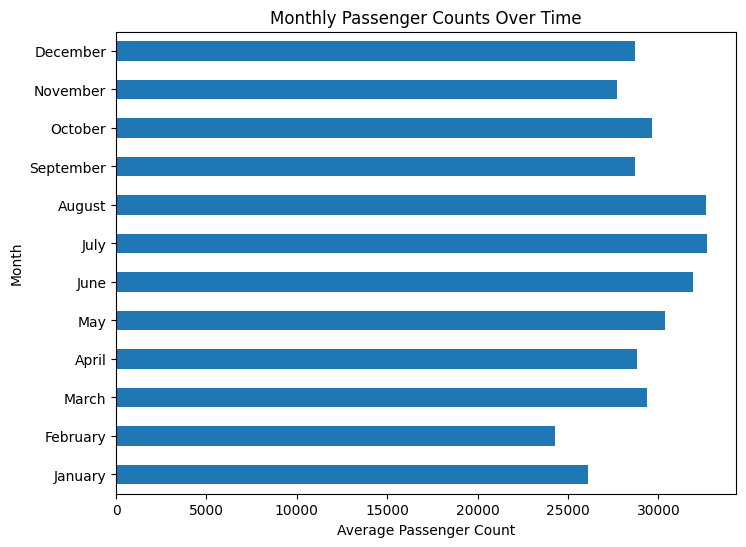

In [ ]:
plt.figure(figsize=(8, 6))
# Define the correct order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Convert the Month column to a categorical type with the correct order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
plt.title('Monthly Passenger Counts Over Time')
df.groupby(df['Month'])['Passenger Count'].mean().plot.barh()
plt.ylabel('Month')
plt.xlabel('Average Passenger Count')

plt.show()


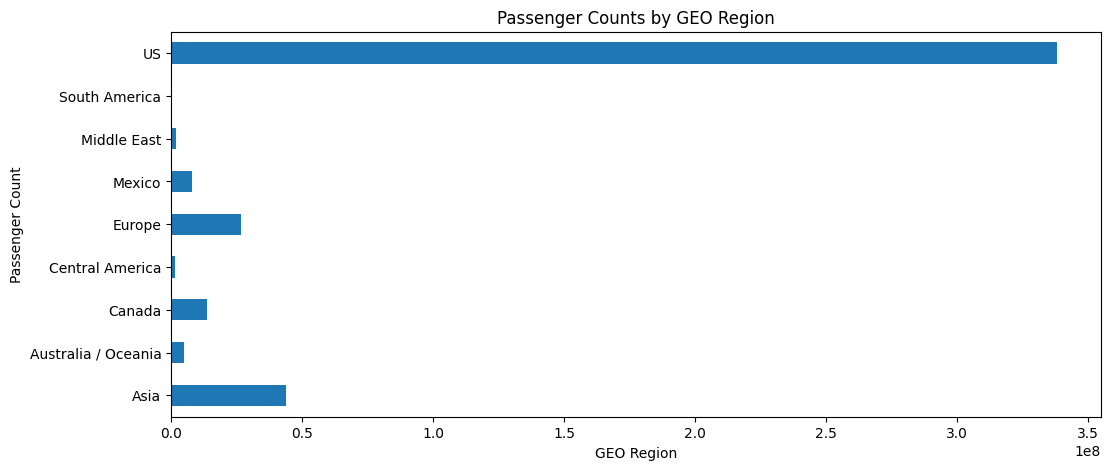

In [ ]:
# Regional Analysis
regional_analysis = df.groupby('GEO Region')['Passenger Count'].sum()

plt.figure(figsize=(12, 5))
regional_analysis.plot.barh()
plt.title('Passenger Counts by GEO Region')
plt.xlabel('GEO Region')
plt.ylabel('Passenger Count')
plt.show()


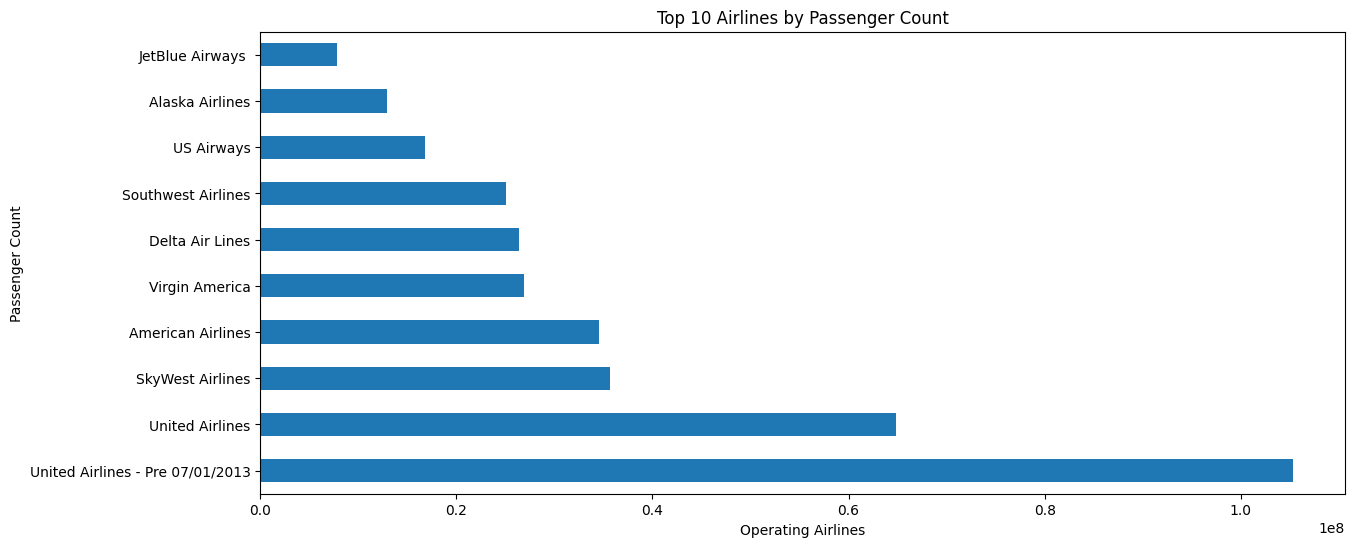

In [ ]:
# Airline Performance
airline_performance = df.groupby('Operating Airline')['Passenger Count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 6))
airline_performance.plot(kind='barh')
plt.title('Top 10 Airlines by Passenger Count')
plt.xlabel('Operating Airlines')
plt.ylabel('Passenger Count')
plt.show()

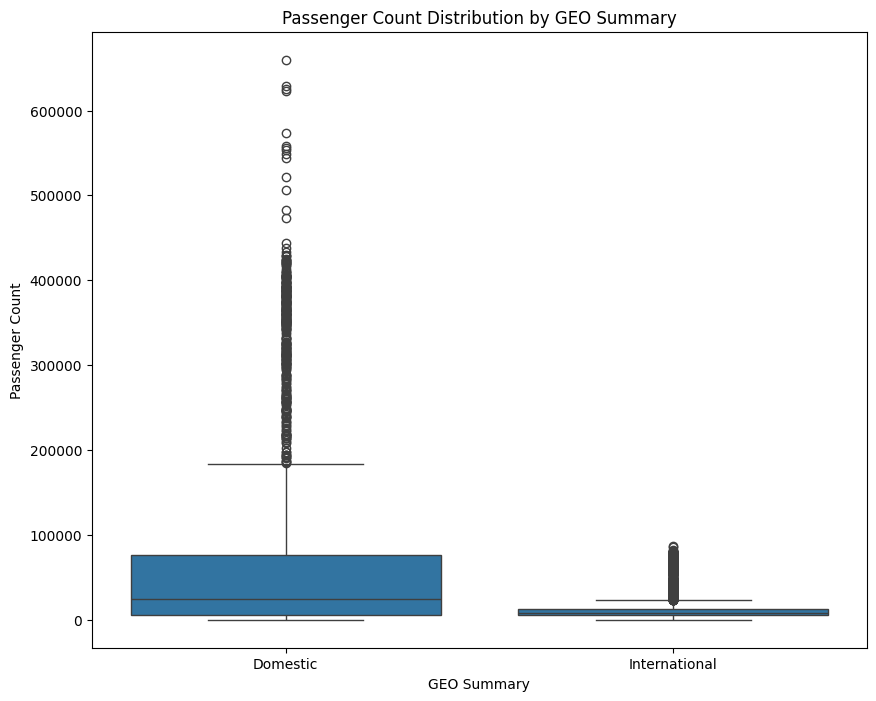

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='GEO Summary', y='Passenger Count', data=df)
plt.title('Passenger Count Distribution by GEO Summary')
plt.show()





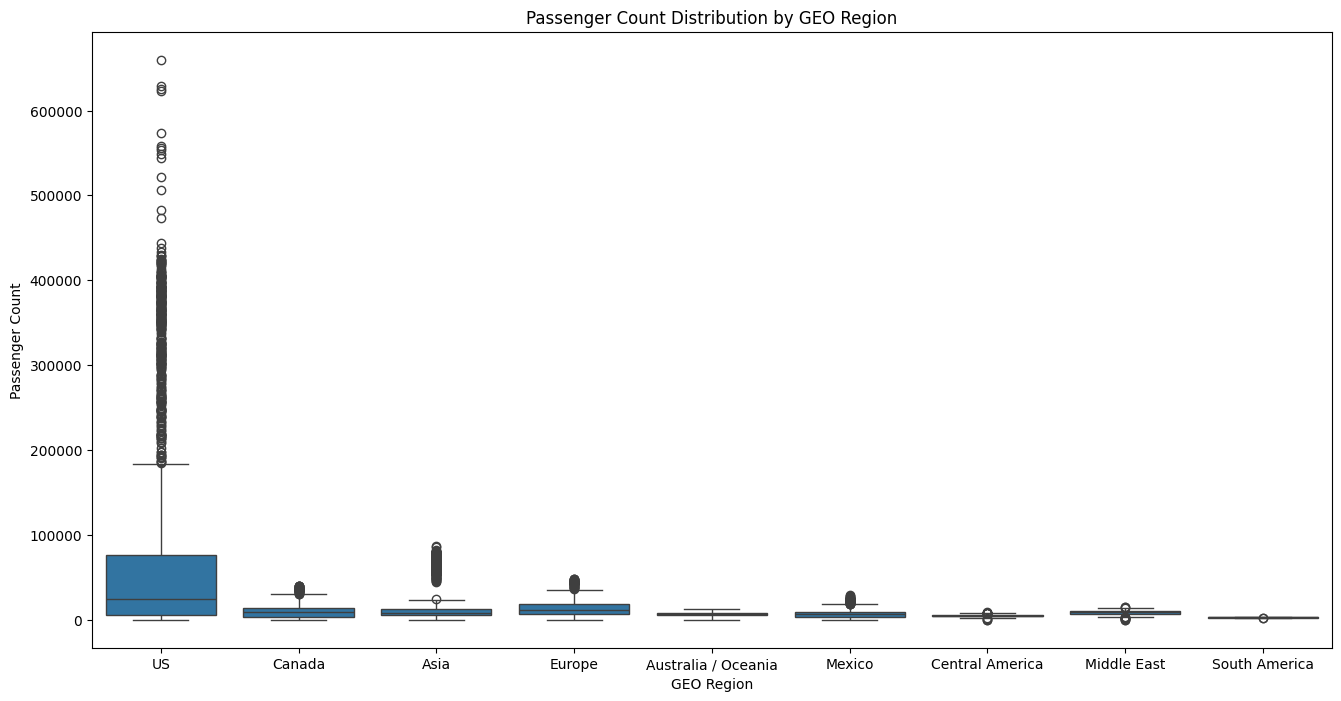

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='GEO Region', y='Passenger Count', data=df)
plt.title('Passenger Count Distribution by GEO Region')
plt.show()

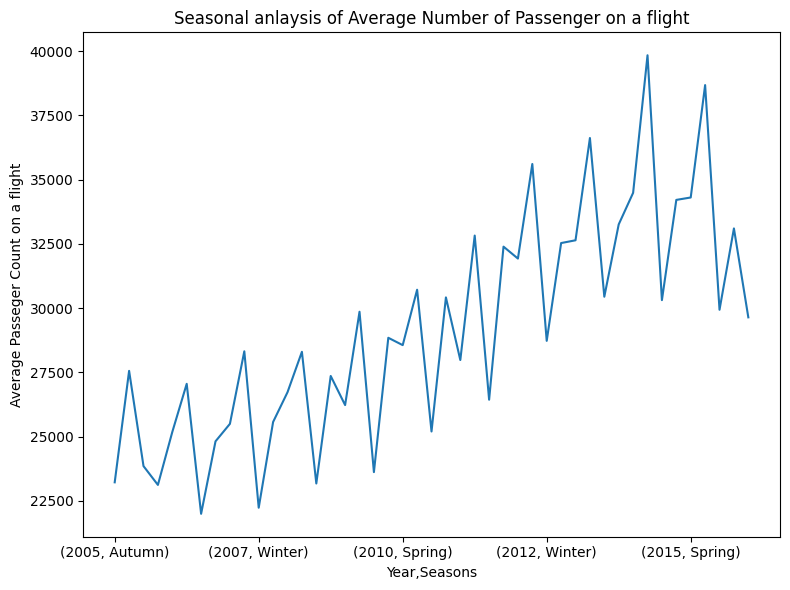

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Seasonal anlaysis of Average Number of Passenger on a flight')
df.groupby(['Year','Seasons'])['Passenger Count'].mean().plot()
plt.ylabel("Average Passeger Count on a flight")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Flights to Different Reigons')

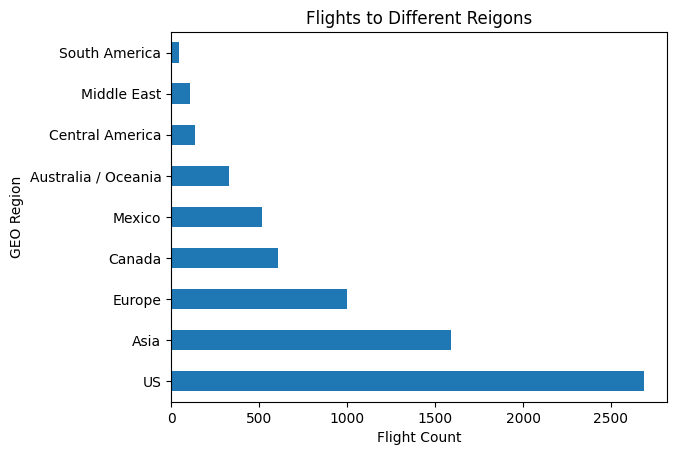

In [ ]:
df[df['Activity Type Code']=='Enplaned']['GEO Region'].value_counts().plot.barh()
plt.xlabel('Flight Count')
plt.title("Flights to Different Reigons")

Text(0.5, 1.0, 'Flights from Different Reigons')

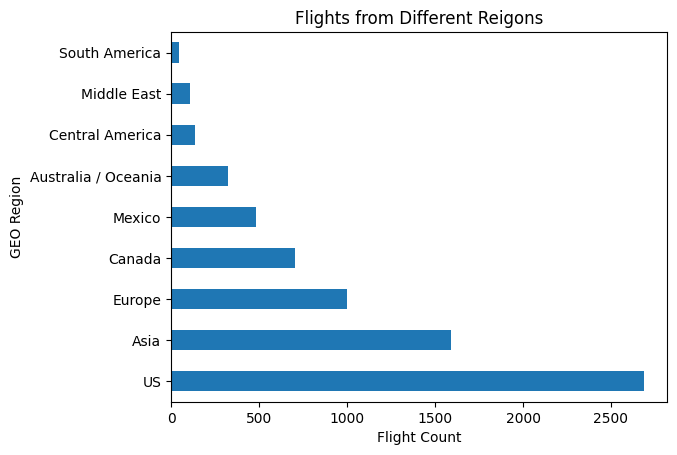

In [ ]:
df[df['Activity Type Code']=='Deplaned']['GEO Region'].value_counts().plot.barh()
plt.xlabel('Flight Count')
plt.title("Flights from Different Reigons")

In [ ]:
df.to_csv('output.csv', index=False)


In [ ]:
df3=pd.read_csv("output.csv")
df3=df.groupby(["Activity Period","GEO Summary"])['Passenger Count'].sum().unstack().reset_index()
df3["Activity Period"]=pd.to_datetime(df3["Activity Period"], infer_datetime_format=True)
df3=df3.set_index("Activity Period")
df3.head()

<ipython-input-86-bad7eb499f89>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df3["Activity Period"]=pd.to_datetime(df3["Activity Period"], infer_datetime_format=True)


GEO Summary,Domestic,International
Activity Period,,
2005-07-01,2425902,799867
2005-08-01,2405904,789962
2005-09-01,2067923,672630
2005-10-01,2095119,675596
2005-11-01,1998879,618454


In [ ]:
def test_stationarity(timeseries):
  rolmean_international=timeseries['International'].rolling(window=12).mean()
  rolstd_international=timeseries['International'].rolling(window=12).std()
  rolmean_domestic=timeseries['Domestic'].rolling(window=12).mean()
  rolstd_domestic=timeseries['Domestic'].rolling(window=12).std()
  orig_international=plt.plot(timeseries['International'],label="original_international")
  orig_domestic=plt.plot(timeseries['Domestic'],label="original_domestic")
  mean=plt.plot(rolmean_international,label="Rolling mean International")
  mean=plt.plot(rolmean_domestic,label="Rolling mean Domestic")
  std=plt.plot(rolstd_international,label="Rolling std International")
  std=plt.plot(rolstd_domestic,label="Rolling std Domestic")
  plt.legend(loc='best')
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.title("Time Series data with rolling mean and standard deviation")
  plt.show()
  # from statsmodels.tsa.stattools import adfuller
  # dftest= adfuller(timeseries)
  # dfoutput=pd.Series(dftest[0:4],index=['The test statistic',"MacKinnon's approximate p-value","#useLags","NOBS"])
  # print(dfoutput )

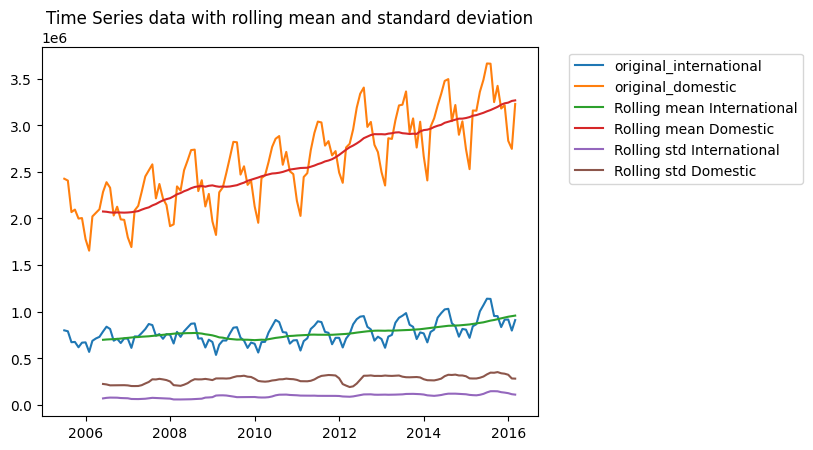

In [ ]:
test_stationarity(df3)

In [ ]:
df2 = pd.read_csv('output.csv')
df2=df2.groupby('Activity Period')['Passenger Count'].sum().reset_index(name="Passenger")
df2["Activity Period"]=pd.to_datetime(df2["Activity Period"], infer_datetime_format=True)
df2.head()

<ipython-input-44-7ffa3cb5dec2>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df2["Activity Period"]=pd.to_datetime(df2["Activity Period"], infer_datetime_format=True)


,Activity Period,Passenger
0,2005-07-01,3225769
1,2005-08-01,3195866
2,2005-09-01,2740553
3,2005-10-01,2770715
4,2005-11-01,2617333


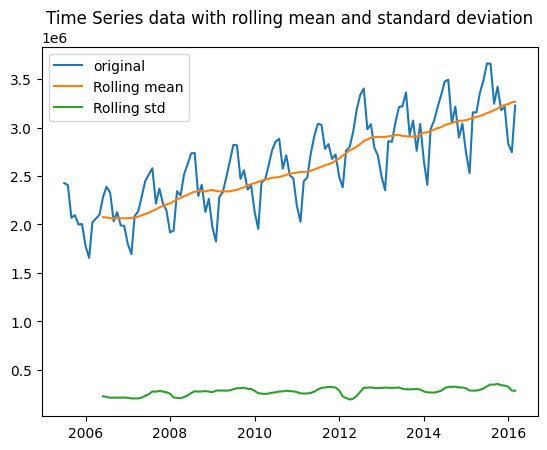

The test statistic                  -0.213920
MacKinnon's approximate p-value      0.936842
#useLags                            13.000000
NOBS                               115.000000
dtype: float64


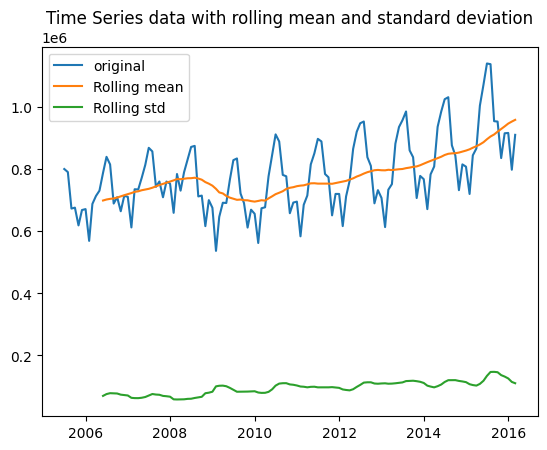

The test statistic                   0.179822
MacKinnon's approximate p-value      0.971107
#useLags                            13.000000
NOBS                               115.000000
dtype: float64


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Activity Period  129 non-null    datetime64[ns]
 1   Passenger        129 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.1 KB


In [ ]:
df2=df2.set_index('Activity Period')
df2.head()

,Passenger
Activity Period,
2005-07-01,3225769
2005-08-01,3195866
2005-09-01,2740553
2005-10-01,2770715
2005-11-01,2617333


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129 entries, 2005-07-01 to 2016-03-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Passenger  129 non-null    int64
dtypes: int64(1)
memory usage: 2.0 KB


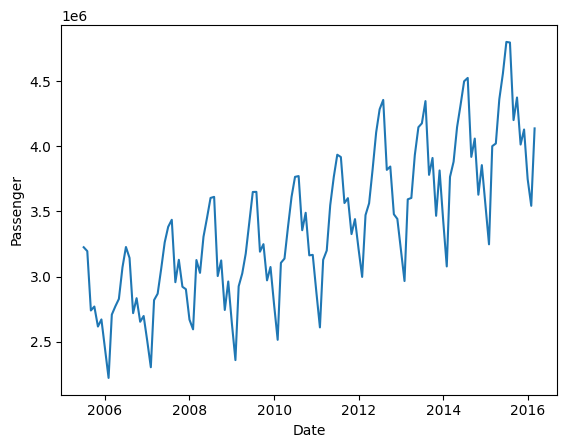

In [ ]:
plt.xlabel("Date")
plt.ylabel("Passenger")
plt.plot(df2)

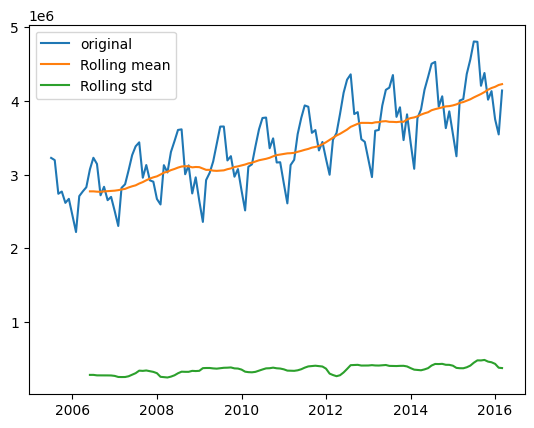

In [ ]:
rolmean=df2.rolling(window=12).mean()
rolstd=df2.rolling(window=12).std()
orig=plt.plot(df2,label="original")
mean=plt.plot(rolmean,label="Rolling mean")
std=plt.plot(rolstd,label="Rolling std")
plt.legend(loc='best')
plt.show()

From the graph rolling mean has a trend
component
Rolling standard deviation is fairly constant with time
For our time series to be stationary we need to ensure both the rolling statistics (mean and std deviation) remain time invariant or constant

In [ ]:
def plot_graph(timeseries):
  rolmean=df2.rolling(window=12).mean()
  rolstd=df2.rolling(window=12).std()
  orig=plt.plot(df2,label="original")
  mean=plt.plot(rolmean,label="Rolling mean")
  std=plt.plot(rolstd,label="Rolling std")
  plt.legend(loc='best')
  plt.title("Time Series data with rolling mean and standard deviation")
  plt.show()


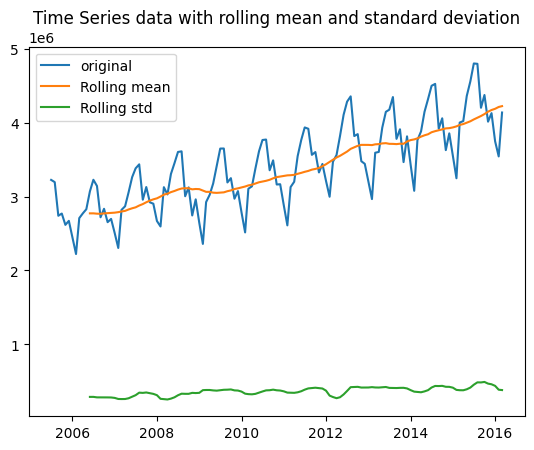

In [ ]:
plot_graph(df2)

In [ ]:
def adcf_test(timeseries):
  from statsmodels.tsa.stattools import adfuller

  dftest= adfuller(timeseries)

  print(dftest )

In [ ]:
def test_stationarity(timeseries):
  rolmean=timeseries.rolling(window=12).mean()
  rolstd=timeseries.rolling(window=12).std()
  orig=plt.plot(timeseries,label="original")
  mean=plt.plot(rolmean,label="Rolling mean")
  std=plt.plot(rolstd,label="Rolling std")
  plt.legend(loc='best')
  plt.title("Time Series data with rolling mean and standard deviation")
  plt.show()
  from statsmodels.tsa.stattools import adfuller
  dftest= adfuller(timeseries)
  dfoutput=pd.Series(dftest[0:4],index=['The test statistic',"MacKinnon's approximate p-value","#useLags","NOBS"])
  print(dfoutput )

In [ ]:
adcf_test(df2)

(0.23418957792502287, 0.974115293261253, 13, 115, {'1%': -3.4885349695076844, '5%': -2.887019521656941, '10%': -2.5803597920604915}, 2958.8441188161905)


 p value should be less than 0.05 so its not stationary

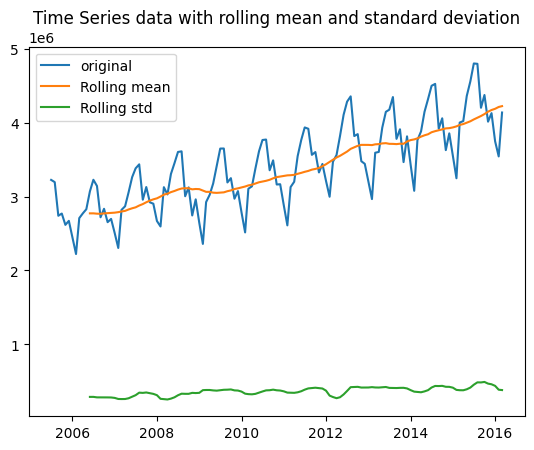

The test statistic                   0.234190
MacKinnon's approximate p-value      0.974115
#useLags                            13.000000
NOBS                               115.000000
dtype: float64


In [ ]:
test_stationarity(df2)

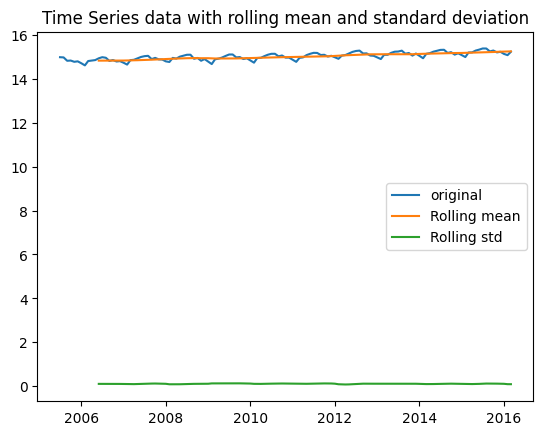

The test statistic                  -0.285393
MacKinnon's approximate p-value      0.927548
#useLags                            13.000000
NOBS                               115.000000
dtype: float64


In [ ]:
df2_log_scaled=np.log(df2)
test_stationarity(df2_log_scaled)

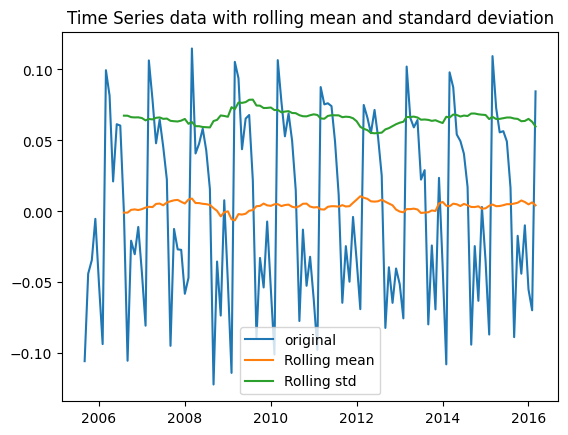

The test statistic                  -3.051961
MacKinnon's approximate p-value      0.030319
#useLags                            11.000000
NOBS                               115.000000
dtype: float64


In [ ]:
ma=df2_log_scaled.rolling(window=3).mean()
df2_log_scaled_minus_ma = df2_log_scaled-ma
df2_log_scaled_minus_ma.dropna(inplace=True)
test_stationarity(df2_log_scaled_minus_ma)

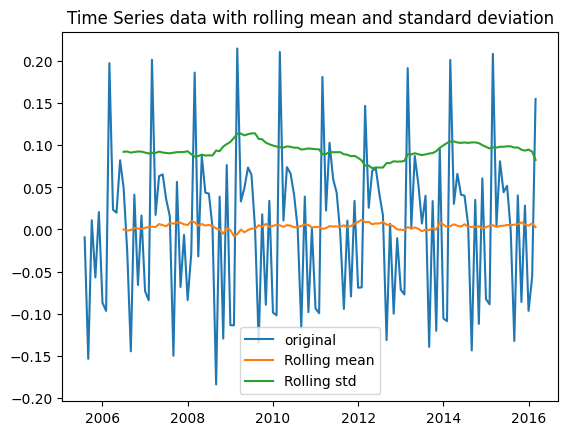

The test statistic                  -2.824177
MacKinnon's approximate p-value      0.054902
#useLags                            13.000000
NOBS                               114.000000
dtype: float64


In [ ]:
df2_log_scaled_ps=df2_log_scaled.diff(periods=1)
df2_log_scaled_ps.dropna(inplace=True)
test_stationarity(df2_log_scaled_ps)

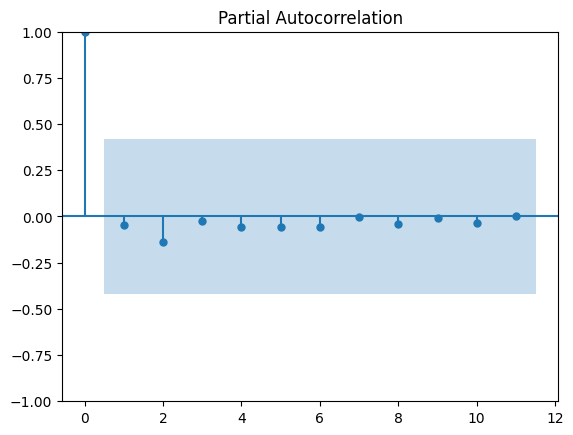

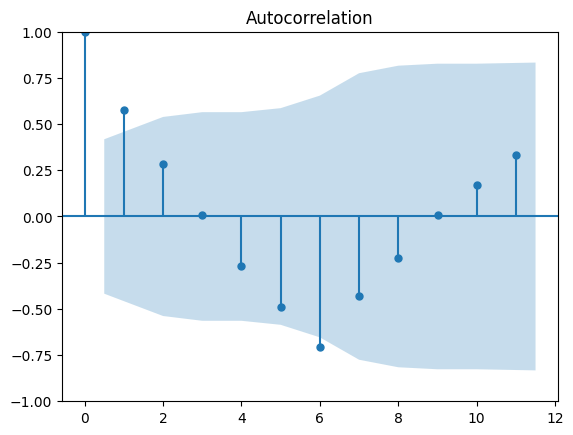

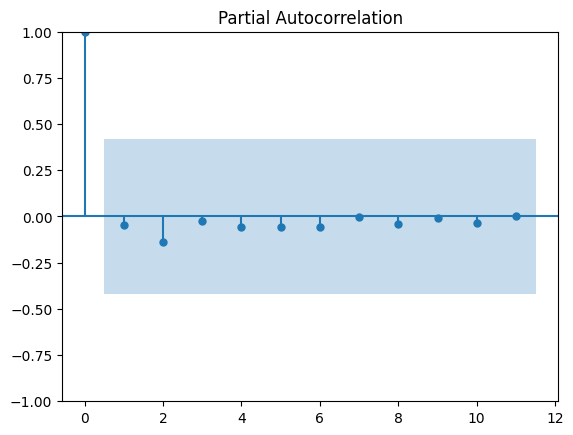

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
lag_acf=acf(df2_log_scaled_minus_ma)
lag_pacf=pacf(df2_log_scaled_minus_ma)
plot_acf(lag_acf)
plot_pacf(lag_pacf)

Auto regressive(p-value)=1 from pacf plot.
Differentiation(d_value)=3 from the window/period value.
Moving average (q value)=3 from (ACF plot)


In [ ]:
df2_log_scaled_minus_ma.head()

,Passenger
Activity Period,
2005-09-01,-0.105570
2005-10-01,-0.043936
2005-11-01,-0.034318
2005-12-01,-0.005253
2006-01-01,-0.051213


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
df2_log_scaled_minus_ma.dropna(inplace=True)
train,test=train_test_split(df2_log_scaled_minus_ma,test_size=0.2,shuffle=False)
model_arima=ARIMA(train,order=(22,0,3))

model_arima_fit = model_arima.fit()
predictions=model_arima_fit.predict(start="2005-09-01",end='2016-03-01')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# from sklearn.metrics import mean_squared_error
# error=mean_squared_error(test,predictions)
# print("Test MSE: ",error)

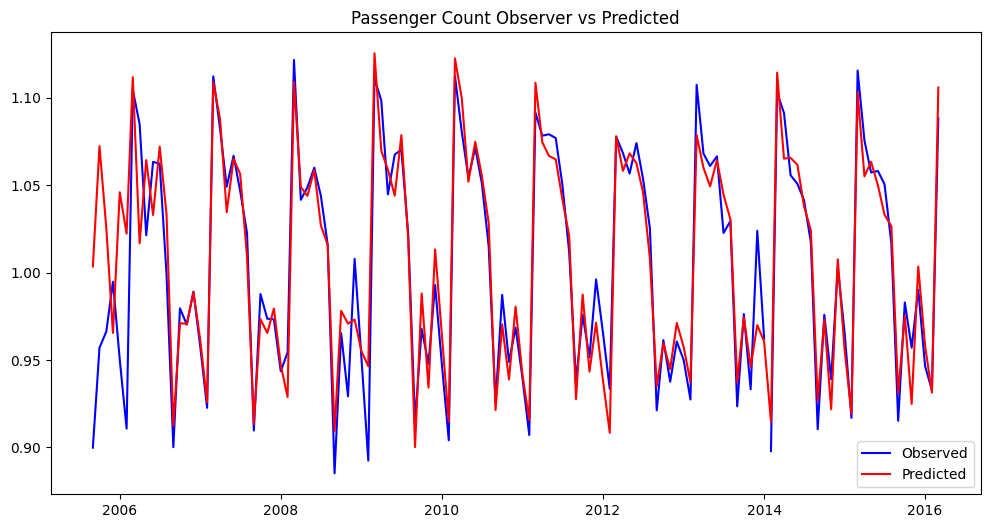

In [ ]:
plt.figure(figsize=(12,6))
predict=np.exp(predictions)
train_set=np.exp(train)
test_set=np.exp(test)
plt.plot(train_set,color='blue',label="Observed")
plt.plot(test_set,color='blue')
plt.title("Passenger Count Observer vs Predicted")

plt.plot(predict,color='red',label="Predicted")
plt.legend()
plt.show()

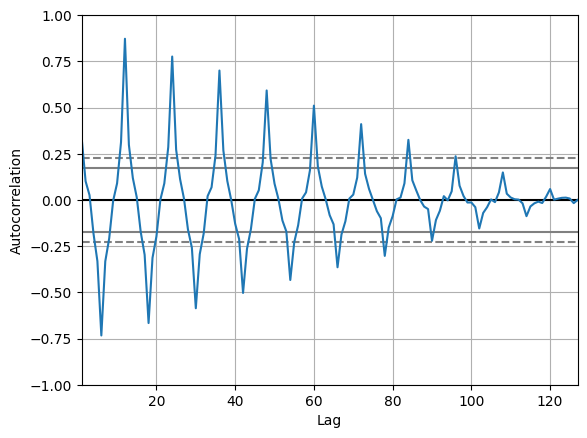

In [ ]:
#Auto regressive plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2_log_scaled_minus_ma)
plt.show()


In [ ]:
forecast=model_arima_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=df2.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()


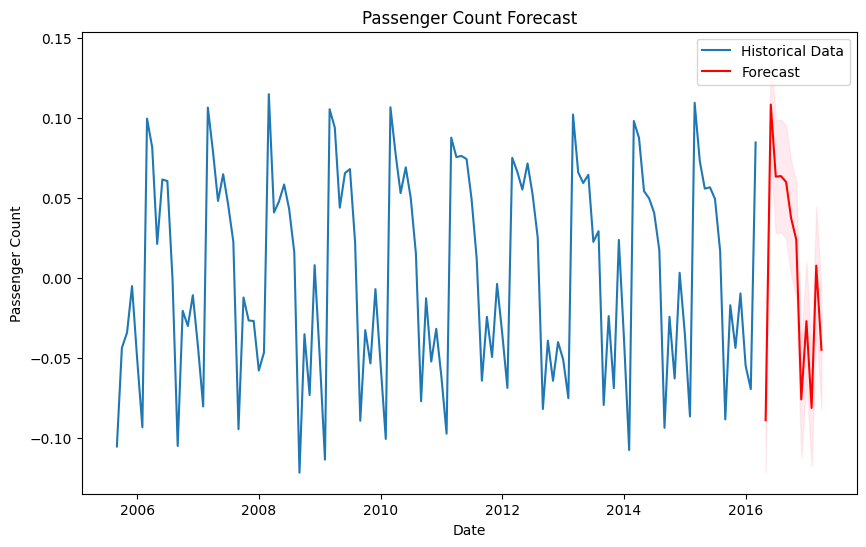

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df2_log_scaled_minus_ma.index, df2_log_scaled_minus_ma['Passenger'], label='Historical Data')
plt.plot(forecast_index, forecast_values, color='red', label='Forecast')
plt.fill_between(forecast_index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.title('Passenger Count Forecast')
plt.legend()
plt.show()